# Project: FBI Gun Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will investigate two sets of data.

The first set comes from the FBI's National Instant Criminal Background Check System.
It includes records of requested background checks by Gun shops to check if the customer has any criminal records.

The second data set  has been supplemented with state level data from census.gov.

We will try and answer a couple of questions by exploring those two data sets like:
- Did gun registerations grow over the years
- Is there a certain type of gun that was more popular
- Which states has the most gun regesterations
- Which states have the highest gun registeration per capita ?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading up the data
df=pd.read_csv('u.s.-census-data.csv')
df_gun=pd.read_excel('gun-data.xlsx')

In [3]:
# Displaying the first set to check it
df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [4]:
# Checking if there are missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

- It seems that the census data is not missing data aside from the fact note which can be discarded 
- Also it would be better to transpose the data to be able to compare/merge them later with the second dataframe

In [5]:
# Checking the data types in case any needs to be changed
df.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


- We'll need to change the types of the data into floats to be able to display later

In [6]:
# Checking the second data set
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [7]:
# Checking missing data
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

- The null data does not seem to make a problem since it is not age or something that has to have a value other than zero

### Data Cleaning

We will perform some data cleaning in order to better handle the data based on the previous deductions like:
- Removing the fact note column from the census data set
- Transposing the census data set to match the NICS data set
- Cleaning the census data set of non required columns 
- Changing data types to ones that can be better handled
- Adding columns for years since we will check for the trend over the years

In [8]:
# Will start with removing the fact note column 
df.drop(columns='Fact Note',inplace=True)
df.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [9]:
# After trying to transpose the data frame it kept returning the index as the column name
# so after searching i will set the index to the first column and then transpose the data frame
df.set_index('Fact',inplace=True)

In [10]:
# Next i'll transpose the data frame to be able to compare/merge it with the second data frame
df_trns=df.transpose()

In [11]:
# Dropping all the non required columns at the end
df_trns.drop(df_trns.columns[20:],axis=1,inplace=True)

In [12]:
# Dropping columns that are not related to 2016 since this is the year that will be studied later
cols_to_drop=[]
iter=[1,2,3,5,7,9,11]
for i in iter:
    cols_to_drop.append(df_trns.columns[i])
df_trns.drop(cols_to_drop,axis=1,inplace=True)


In [13]:
# Changing the data types into floats to be ablt to add them or perform any other operation
# After trying to change the  types there was some values that are numbers so we will remove them first
df_trns.replace(to_replace='Z',value=0,inplace=True)
df_trns.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)"
Alabama,"4,863,300",6.00%,22.60%,16.10%,51.60%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%
Alaska,"741,894",7.30%,25.20%,10.40%,47.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%
Arizona,"6,931,071",6.30%,23.50%,16.90%,50.30%,83.30%,4.90%,5.40%,3.40%,0.30%,2.80%,30.90%,55.50%
Arkansas,"2,988,248",6.40%,23.60%,16.30%,50.90%,79.40%,15.70%,1.00%,1.60%,0.30%,2.00%,7.30%,72.90%
California,"39,250,017",6.30%,23.20%,13.60%,50.30%,72.70%,6.50%,1.70%,14.80%,0.50%,3.80%,38.90%,37.70%


In [14]:
# Changing the data types into floats
for c in df_trns.columns:
    if df_trns[c].dtypes != 'float64':
        df_trns[c]=df_trns[c].str.replace('%|,',"").astype('float')

C:\Users\Fouad\AppData\Local\Temp/ipykernel_1404/4170818147.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_trns[c]=df_trns[c].str.replace('%|,',"").astype('float')


In [15]:
# renaming the month column a proper name since we will add a column later with the name month for the months
df_gun.rename(columns={'month':'date'},inplace=True)
df_gun.head()

,date,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [16]:
# Changing the date column data type to be able to extract month and year from
df_gun['date']=pd.to_datetime(df_gun['date'])
df_gun['date'].dtype

dtype('<M8[ns]')

In [17]:
# Adding columns for the year and month to use later
df_gun['year']=df_gun['date'].dt.year
df_gun['month']=df_gun['date'].dt.month_name()
df_gun.head()

,date,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,month
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017,September
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017,September
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017,September
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017,September
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017,September


<a id='eda'></a>
## Exploratory Data Analysis

### Q1 Did gun registerations grow over the years

In [18]:
guns_by_year=df_gun.groupby('year').sum()

In [19]:
# Creating a function to plot columns with different
def plott(col,type):
    guns_by_year.plot(y=col,kind=type,figsize=(15,10));


Text(0, 0.5, 'Gun registrations')

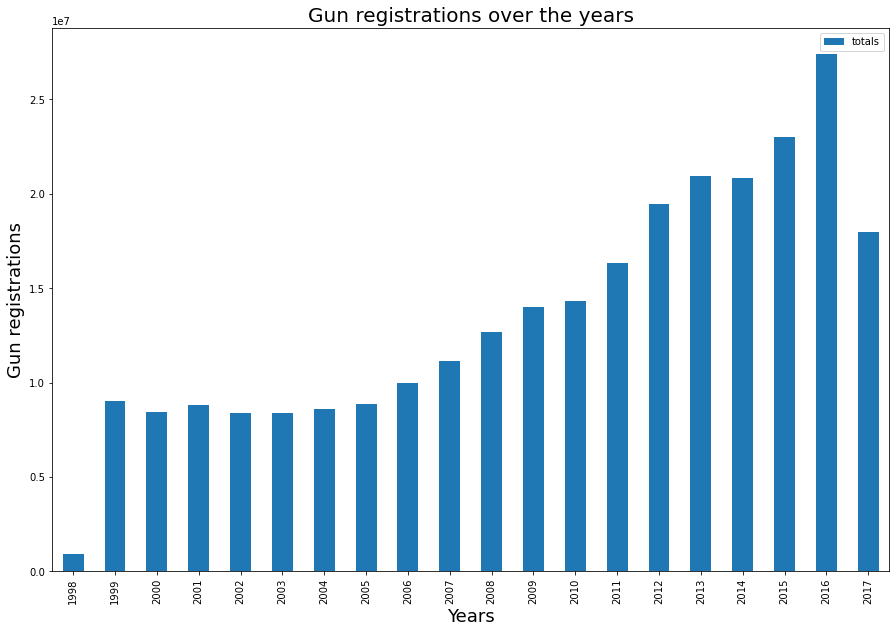

In [40]:
# To answer that question we need to group the NICS data by year from the year column we added
# using the predefined function

plott('totals','bar')
plt.title('Gun registrations over the years', fontsize=20)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Gun registrations', fontsize=18)

It seems the gun registeration was steady from 1999 till 2004 then it increased over the years until it reached its peak on 2016 then decreased

### Q2 Is there a certain type of gun that was more popular

Text(0, 0.5, 'Gun registrations')

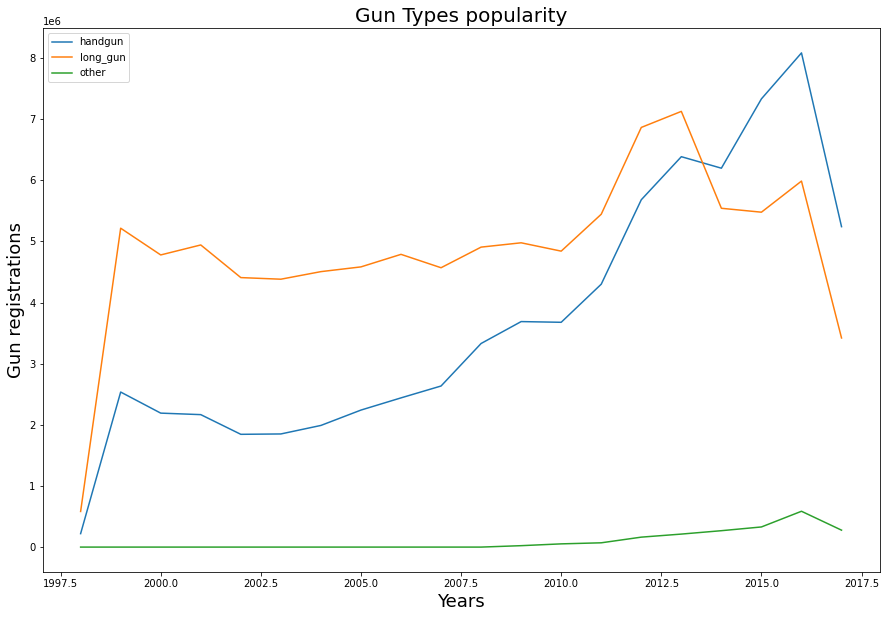

In [41]:
# We will check the main bulk amount of guns registerations, ignoring the rentals, private sales and pawns
# So will again use the grouped data frame but will display the three types using the pre-defined function
plott(['handgun','long_gun','other'],'line')
plt.title('Gun Types popularity', fontsize=20)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Gun registrations', fontsize=18)

According to the above graph the long guns where more popular with the handguns closing the gap untill 2013-2014 the handguns became more popular 

The other types registerations did not change for the most part with the slight rise from 2015 to 2016

### Q3 Which states has the most gun regesterations

Text(0, 0.5, 'Gun registrations')

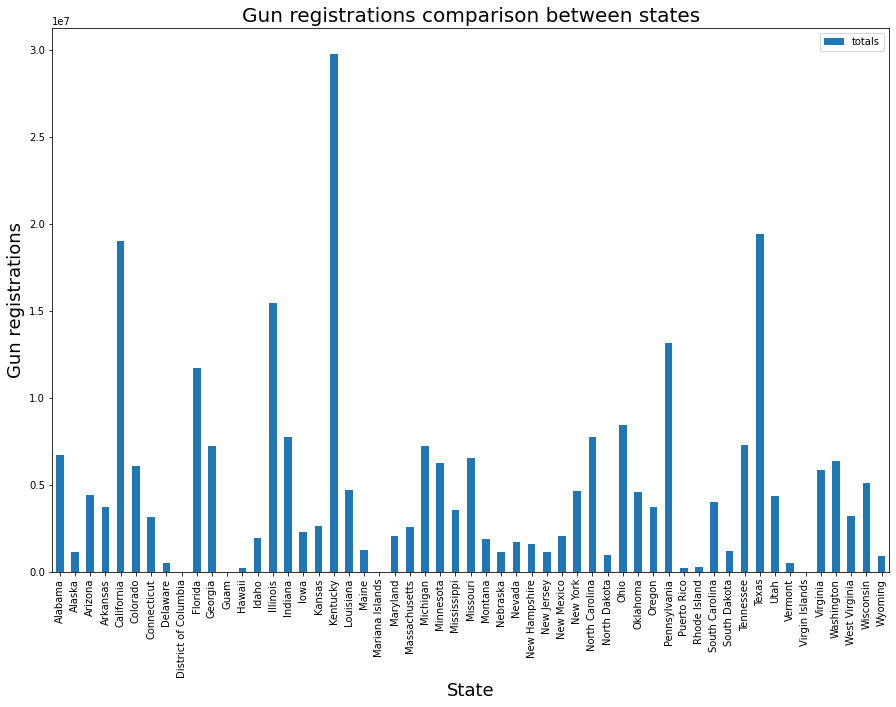

In [42]:
# For that we will group the NICS data frame by state

guns_by_state=df_gun.groupby('state').sum()
guns_by_state.plot(y=['totals'],kind='bar',figsize=(15,10));
plt.title('Gun registrations comparison between states', fontsize=20)
plt.xlabel('State', fontsize=18)
plt.ylabel('Gun registrations', fontsize=18)

Kentucky, California and Texas seems to be the highest in gun registeration
However that can be related to population

### Q4 Which states have the highest gun registeration per capita ?

In [43]:
# To check the gun registerations per capita we will filter the NICS data to get the 2016 gun registeration
# and compare it against the populations of the states

gun_date_2016=df_gun.query('year == 2016').groupby('state').sum()
gun_date_2016.head()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
state,,,,,,,,,,,,,,,,,,,,,
Alabama,291039.0,0.0,153123.0,121963.0,6104.0,6545,5.0,111.0,114.0,2.0,...,0.0,0.0,72.0,65.0,4.0,3.0,2.0,0.0,616947,24192
Alaska,3121.0,0.0,37491.0,36887.0,2889.0,2316,0.0,84.0,70.0,0.0,...,0.0,0.0,39.0,66.0,1.0,2.0,3.0,0.0,87647,24192
Arizona,87771.0,5109.0,166784.0,108988.0,13122.0,7908,0.0,74.0,60.0,3.0,...,0.0,0.0,76.0,56.0,11.0,11.0,11.0,1.0,416279,24192
Arkansas,55456.0,7036.0,80244.0,82120.0,3059.0,4400,143.0,77.0,116.0,3.0,...,0.0,0.0,72.0,64.0,6.0,7.0,4.0,1.0,266014,24192
California,1036981.0,0.0,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377167,24192


In [24]:
# Next we will add the filtered NICS data to the 2016 census 

combined=pd.concat([df_trns,gun_date_2016],axis=1,join='inner')
combined.head()

,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)",...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
Alabama,4863300.0,6.0,22.6,16.1,51.6,69.3,26.8,0.7,1.4,0.1,...,0.0,0.0,72.0,65.0,4.0,3.0,2.0,0.0,616947,24192
Alaska,741894.0,7.3,25.2,10.4,47.7,66.1,3.8,15.2,6.3,1.3,...,0.0,0.0,39.0,66.0,1.0,2.0,3.0,0.0,87647,24192
Arizona,6931071.0,6.3,23.5,16.9,50.3,83.3,4.9,5.4,3.4,0.3,...,0.0,0.0,76.0,56.0,11.0,11.0,11.0,1.0,416279,24192
Arkansas,2988248.0,6.4,23.6,16.3,50.9,79.4,15.7,1.0,1.6,0.3,...,0.0,0.0,72.0,64.0,6.0,7.0,4.0,1.0,266014,24192
California,39250017.0,6.3,23.2,13.6,50.3,72.7,6.5,1.7,14.8,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2377167,24192


In [25]:
# We'll create a new column to calculate the gun registeration per capita in

combined['density']=combined['totals']/combined['Population estimates, July 1, 2016,  (V2016)']


Text(0, 0.5, 'Gun registrations per capita')

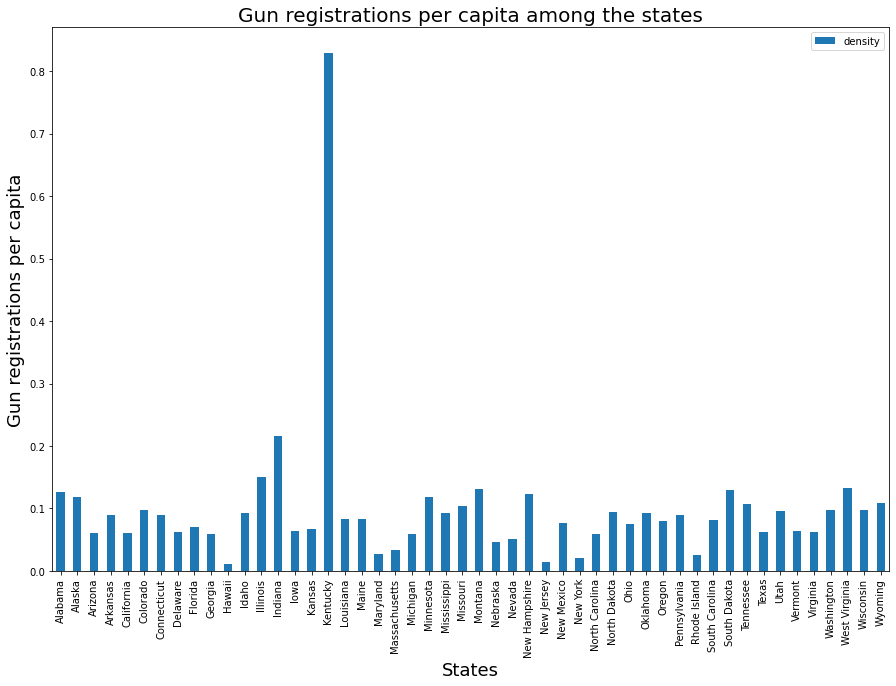

In [44]:
# Then we will plot a gun per capita in every state chart
combined.plot(y=['density'],kind='bar',figsize=(15,10));
plt.title('Gun registrations per capita among the states', fontsize=20)
plt.xlabel('States', fontsize=18)
plt.ylabel('Gun registrations per capita', fontsize=18)

From the chart we can see Kuntucky seems to lead the highest registered guns per capita with Indiana in second place

California and Texas high gun registerations from the previous questions may be due to high population as we see here they have receeded to lower ranks when checked across the population

<a id='conclusions'></a>
## Conclusions

From our EDA we can see that gun registeration was steady from 1999 till 2004 then it increased over the years until it reached its peak on 2016 then decreased.

At the same time the long guns were more popular from 1999 with the handguns closing the gap untill 2013-2014 when the handguns became more popular and the other types of guns slightly rise in popularity but still far away from long guns and handguns.

Kentucky, California and Texas seems to be the highest in gun registeration
However that turned out to be related to population as we checked them again for the year 2016 against the population. Only Kentucky was leading the chart with Indiana in second place.

### Limitations
- The Gun data has the states as well as the territories making 55 however the census data has only the 50 states so had to drop the 5 extra when merging
- The background check for a gun does not represent gun sales by any means therefore this analysis only refers to the registeration requests
- the census data has mostly 2016's data and some 2010's so the comparison is not reliable in comparison to one that would have the data from all the years as the gun data ones
- some data from NICS are supressed as their publication was not possible